<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [124]:
#importing data from excelsheet
consumer_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(consumer_sales)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [125]:
consumer=data.groupby('Segment')
consumer_mod=consumer.get_group('Consumer')
consumer_mod.shape

(5191, 21)

In [126]:
consumer_mod.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [127]:
consumer_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5191 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         5191 non-null   int64         
 1   Order ID       5191 non-null   object        
 2   Order Date     5191 non-null   datetime64[ns]
 3   Ship Date      5191 non-null   datetime64[ns]
 4   Ship Mode      5191 non-null   object        
 5   Customer ID    5191 non-null   object        
 6   Customer Name  5191 non-null   object        
 7   Segment        5191 non-null   object        
 8   Country        5191 non-null   object        
 9   City           5191 non-null   object        
 10  State          5191 non-null   object        
 11  Postal Code    5191 non-null   int64         
 12  Region         5191 non-null   object        
 13  Product ID     5191 non-null   object        
 14  Category       5191 non-null   object        
 15  Sub-Category   5191 non-nu

In [128]:
for i in consumer_mod.columns:
  print(i,':','\n',consumer_mod[i].unique())

Row ID : 
 [   1    2    4 ... 9992 9993 9994]
Order ID : 
 ['CA-2016-152156' 'US-2015-108966' 'CA-2014-115812' ... 'CA-2014-110422'
 'CA-2017-121258' 'CA-2017-119914']
Order Date : 
 <DatetimeArray>
['2016-11-08 00:00:00', '2015-10-11 00:00:00', '2014-06-09 00:00:00',
 '2017-04-15 00:00:00', '2016-12-05 00:00:00', '2014-11-11 00:00:00',
 '2014-05-13 00:00:00', '2014-08-27 00:00:00', '2017-07-16 00:00:00',
 '2015-09-25 00:00:00',
 ...
 '2015-05-09 00:00:00', '2014-05-21 00:00:00', '2016-10-10 00:00:00',
 '2014-11-06 00:00:00', '2015-12-29 00:00:00', '2016-08-21 00:00:00',
 '2014-12-28 00:00:00', '2015-09-06 00:00:00', '2015-05-17 00:00:00',
 '2014-01-21 00:00:00']
Length: 1044, dtype: datetime64[ns]
Ship Date : 
 <DatetimeArray>
['2016-11-11 00:00:00', '2015-10-18 00:00:00', '2014-06-14 00:00:00',
 '2017-04-20 00:00:00', '2016-12-10 00:00:00', '2014-11-18 00:00:00',
 '2014-05-15 00:00:00', '2014-09-01 00:00:00', '2017-07-18 00:00:00',
 '2015-09-30 00:00:00',
 ...
 '2015-05-13 00:00:00'

In [129]:
consumer_mod.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,5191.000000,5191,5191,5191,5191,5191,5191,5191,5191,5191,...,5191.000000,5191,5191,5191,5191,5191,5191.000000,5191.000000,5191.000000,5191.000000
unique,NaN,2586,NaN,NaN,4,409,409,1,1,422,...,NaN,4,1716,3,17,1704,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,TEC-AC-10003832,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,3085,37,37,5191,5191,504,...,NaN,1672,12,3127,780,29,NaN,NaN,NaN,NaN
mean,4928.015604,NaN,2016-04-20 04:21:02.184550144,2016-04-24 02:57:15.638605312,NaN,NaN,NaN,NaN,NaN,NaN,...,55649.895781,NaN,NaN,NaN,NaN,NaN,223.733644,3.760547,0.158141,25.836873
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1453.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2439.500000,NaN,2015-04-28 00:00:00,2015-05-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23464.000000,NaN,NaN,NaN,NaN,NaN,17.264000,2.000000,0.000000,1.583550
50%,4859.000000,NaN,2016-06-06 00:00:00,2016-06-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,60201.000000,NaN,NaN,NaN,NaN,NaN,53.720000,3.000000,0.200000,8.375400
75%,7373.500000,NaN,2017-05-14 00:00:00,2017-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,206.106000,5.000000,0.200000,28.606700
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,13999.960000,14.000000,0.800000,6719.980800


In [130]:
consumer_mod['Category'].value_counts()

,count
Category,
Office Supplies,3127
Furniture,1113
Technology,951


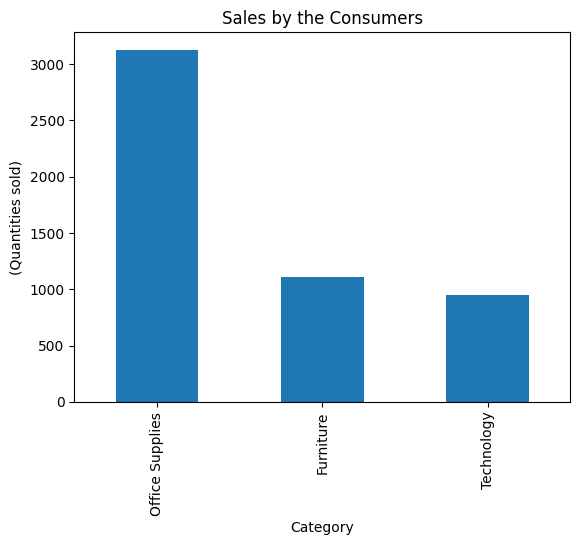

In [131]:
#sales of category items under Consumer segment
plt.xlabel("(Category)")
plt.ylabel("(Quantities sold)")
consumer_mod['Category'].value_counts().plot(kind='bar')
plt.title("Sales by the Consumers")
plt.show()

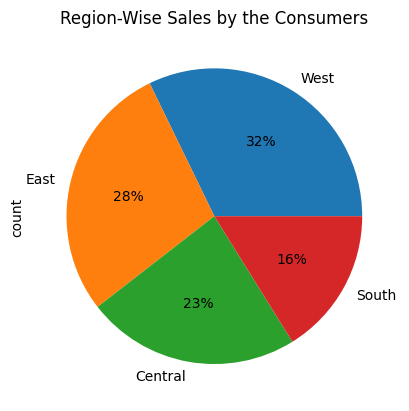

In [132]:
#distirbution of sales pattern about the region by the Corporate category
consumer_mod['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Consumers")
plt.show()

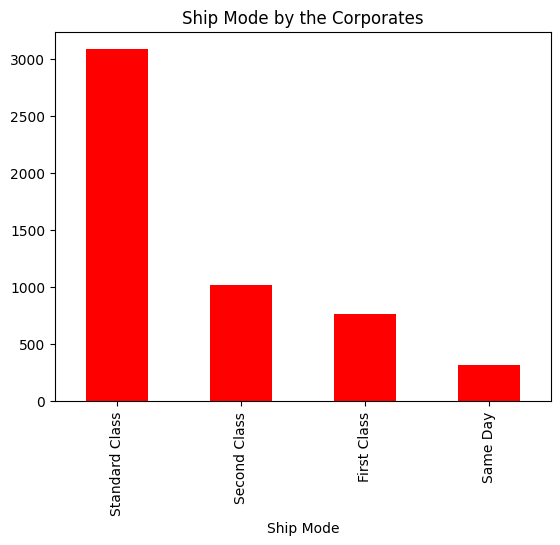

In [133]:
#Shipping mode of items ordered by Consumer segment
consumer_mod['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Corporates")
plt.show()

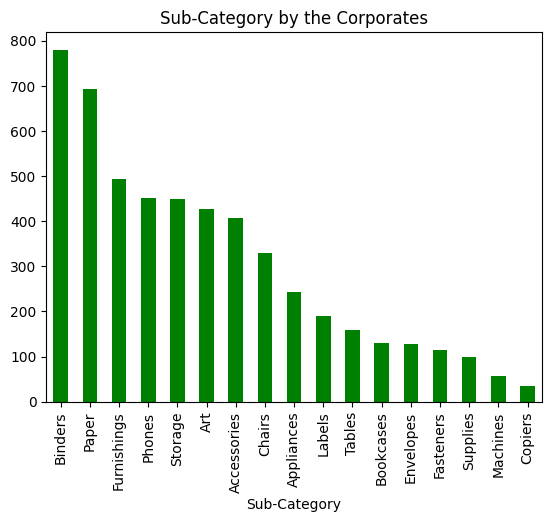

In [134]:
#sub-category items ordered by the Corporate segment
consumer_mod['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Corporates")
plt.show()

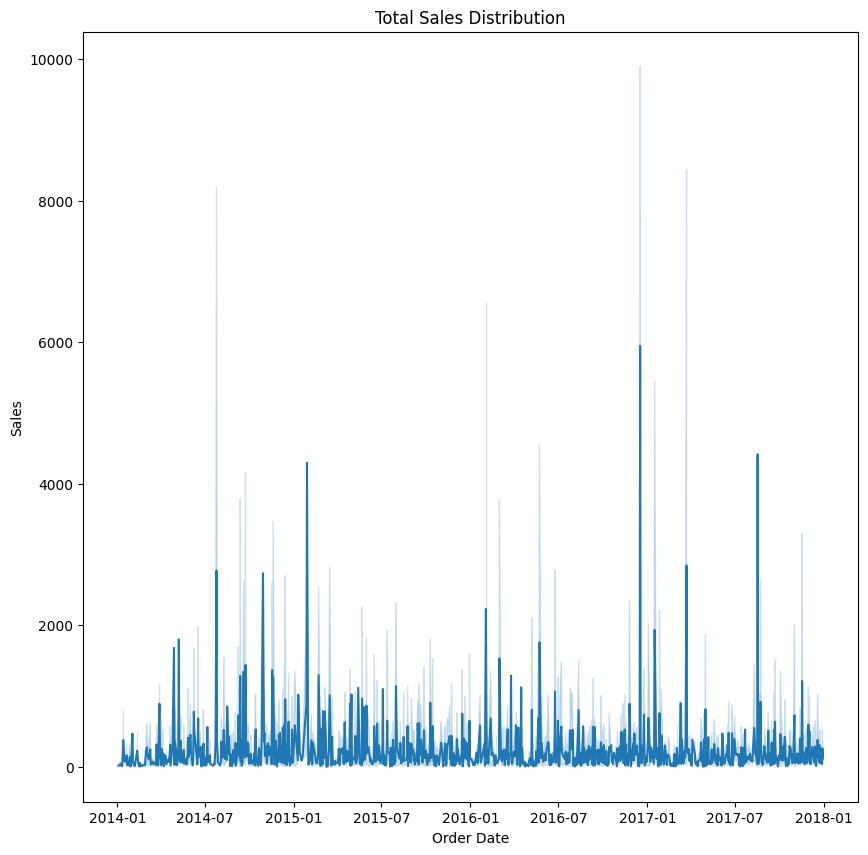

In [135]:
#sales pattern distribution
plt.figure(figsize=(10,10))
sns.lineplot(y=consumer_mod['Sales'],x=consumer_mod['Order Date'])
plt.title("Total Sales Distribution")
plt.show()

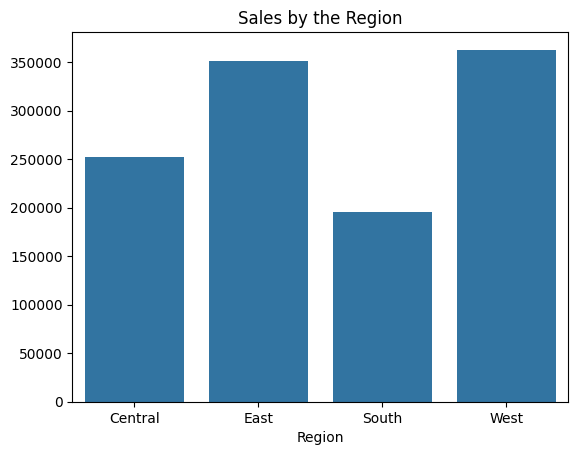

In [136]:
#sales distribution pattern region-wise
sales_region=consumer_mod.groupby('Region')['Sales'].sum()
sns.barplot(x=sales_region.index,y=sales_region.values)
plt.title("Sales by the Region")
plt.show()

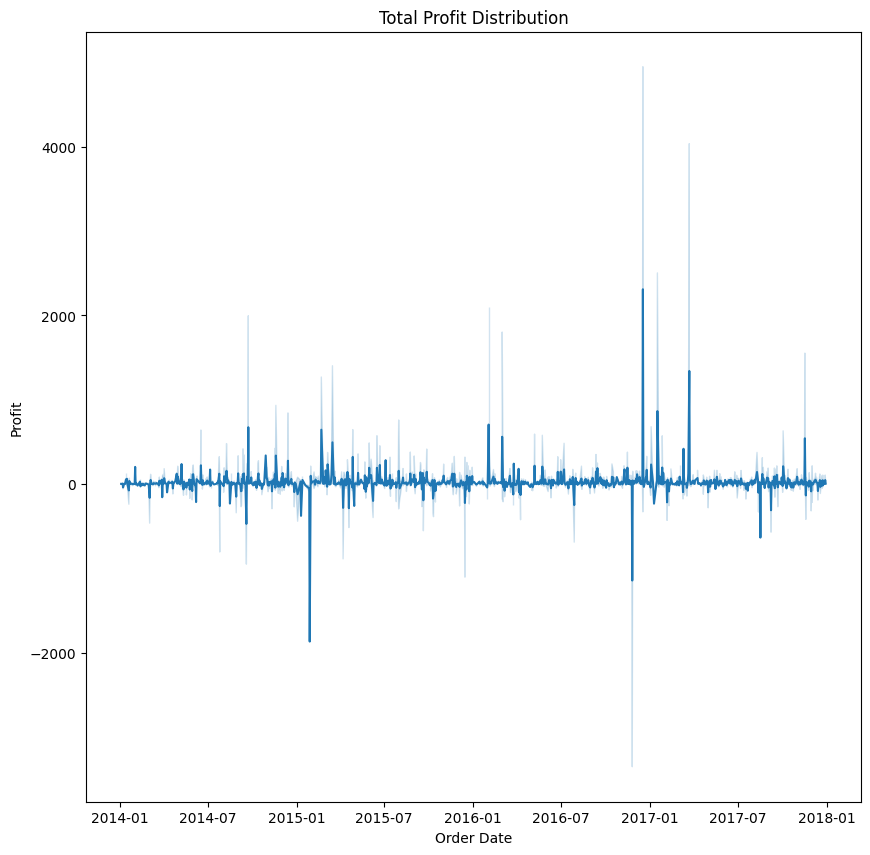

In [137]:
#profit pattern distribution
plt.figure(figsize=(10,10))
sns.lineplot(y=consumer_mod['Profit'],x=consumer_mod['Order Date'])
plt.title("Total Profit Distribution")
plt.show()

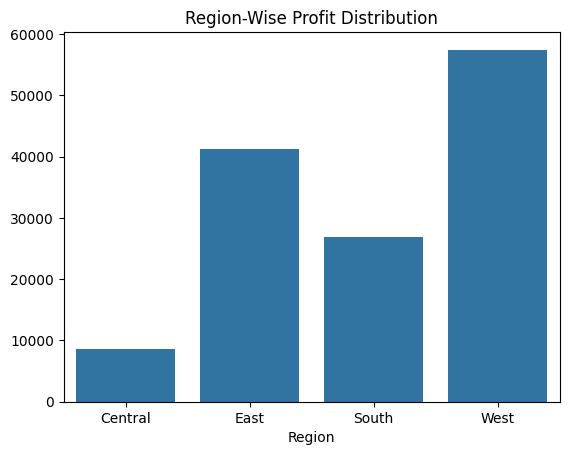

In [138]:
#profit pattern distribution
profit_by_region=consumer_mod.groupby('Region')['Profit'].sum()
sns.barplot(y=profit_by_region.values,x=profit_by_region.index)
plt.title("Region-Wise Profit Distribution")
plt.show()

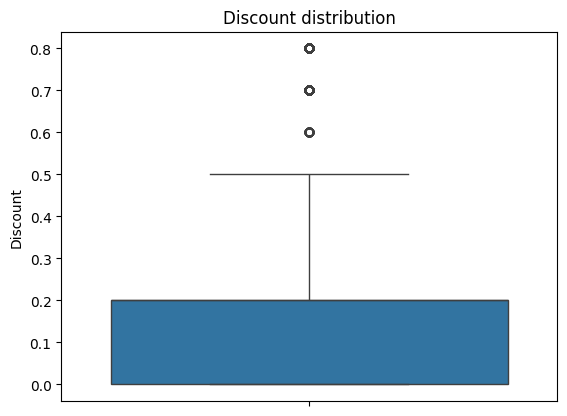

In [139]:
#discount pattern distribution
sns.boxplot(consumer_mod['Discount'])
plt.title("Discount distribution")
plt.show()

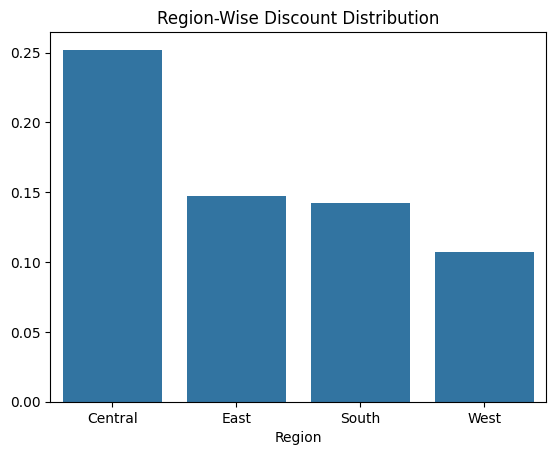

In [140]:
#discount pattern distribution
discount_by_region=consumer_mod.groupby('Region')['Discount'].mean()
sns.barplot(y=discount_by_region.values,x=discount_by_region.index)
plt.title("Region-Wise Discount Distribution")
plt.show()

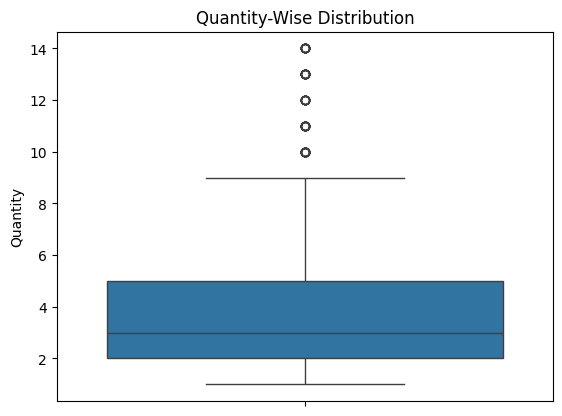

In [141]:
#quantity pattern distribution
sns.boxplot(consumer_mod['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

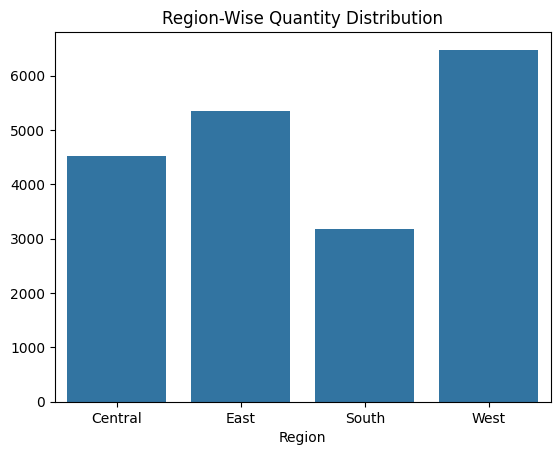

In [142]:
#quantity pattern distribution
quantity_by_region=consumer_mod.groupby('Region')['Quantity'].sum()
sns.barplot(y=quantity_by_region.values,x=quantity_by_region.index)
plt.title("Region-Wise Quantity Distribution")
plt.show()

In [143]:
oe=OrdinalEncoder()
consumer_mod['Ship Mode']=oe.fit_transform(consumer_mod[['Ship Mode']])
consumer_mod['City']=oe.fit_transform(consumer_mod[['City']])
consumer_mod['State']=oe.fit_transform(consumer_mod[['State']])
consumer_mod['Region']=oe.fit_transform(consumer_mod[['Region']])
consumer_mod['Category']=oe.fit_transform(consumer_mod[['Category']])
consumer_mod['Sub-Category']=oe.fit_transform(consumer_mod[['Sub-Category']])
consumer_mod['Segment']=oe.fit_transform(consumer_mod[['Segment']])
consumer_mod['Country']=oe.fit_transform(consumer_mod[['Country']])

<ipython-input-143-36fb204b46d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_mod['Ship Mode']=oe.fit_transform(consumer_mod[['Ship Mode']])
<ipython-input-143-36fb204b46d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_mod['City']=oe.fit_transform(consumer_mod[['City']])
<ipython-input-143-36fb204b46d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [144]:
consumer_mod.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,2.0,CG-12520,Claire Gute,0.0,0.0,152.0,...,42420,2.0,FUR-BO-10001798,0.0,4.0,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,2.0,CG-12520,Claire Gute,0.0,0.0,152.0,...,42420,2.0,FUR-CH-10000454,0.0,5.0,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,3.0,SO-20335,Sean O'Donnell,0.0,0.0,117.0,...,33311,2.0,FUR-TA-10000577,0.0,16.0,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,3.0,SO-20335,Sean O'Donnell,0.0,0.0,117.0,...,33311,2.0,OFF-ST-10000760,1.0,14.0,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,3.0,BH-11710,Brosina Hoffman,0.0,0.0,211.0,...,90032,3.0,FUR-FU-10001487,0.0,9.0,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


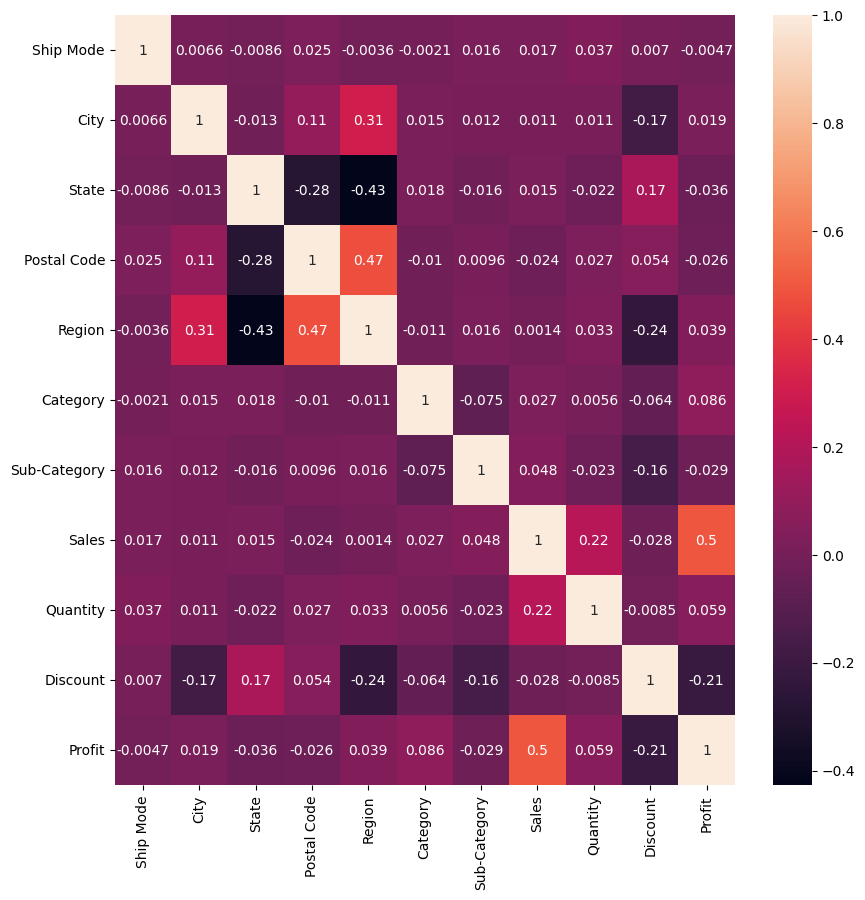

In [145]:
plt.figure(figsize=(10,10))
sns.heatmap(consumer_mod.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1).corr(),annot=True)
plt.show()


In [146]:
consumer_mod_data=pd.DataFrame(consumer_mod.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1))
consumer_mod_data.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2.0,152.0,15.0,42420,2.0,0.0,4.0,261.9600,2,0.00,41.9136
1,2.0,152.0,15.0,42420,2.0,0.0,5.0,731.9400,3,0.00,219.5820
3,3.0,117.0,8.0,33311,2.0,0.0,16.0,957.5775,5,0.45,-383.0310
4,3.0,117.0,8.0,33311,2.0,1.0,14.0,22.3680,2,0.20,2.5164
5,3.0,211.0,3.0,90032,3.0,0.0,9.0,48.8600,7,0.00,14.1694


In [147]:
s=StandardScaler()
consumer_mod_data['Quantity']=s.fit_transform(consumer_mod_data[['Quantity']])
consumer_mod_data['Discount']=s.fit_transform(consumer_mod_data[['Discount']])

In [148]:
for i in consumer_mod_data.columns:
  if consumer_mod_data[i].dtype=='int':
    print(i,':\n')
    q3=consumer_mod_data[i].quantile(0.75)
    q1=consumer_mod_data[i].quantile(0.25)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    print(f'upper limit of {i}:',upper_limit)
    print(f'lower limit of {i}:',lower_limit)
  elif consumer_mod_data[i].dtype=='float':
    print(i,':\n')
    q3=consumer_mod_data[i].quantile(0.75)
    q1=consumer_mod_data[i].quantile(0.25)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    print(f'upper limit of {i}:',upper_limit)
    print(f'lower limit of {i}:',lower_limit)

Ship Mode :

upper limit of Ship Mode: 4.5
lower limit of Ship Mode: 0.5
City :

upper limit of City: 602.5
lower limit of City: -161.5
State :

upper limit of State: 81.5
lower limit of State: -42.5
Postal Code :

upper limit of Postal Code: 189824.0
lower limit of Postal Code: -76352.0
Region :

upper limit of Region: 6.0
lower limit of Region: -2.0
Category :

upper limit of Category: 1.0
lower limit of Category: 1.0
Sub-Category :

upper limit of Sub-Category: 25.5
lower limit of Sub-Category: -10.5
Sales :

upper limit of Sales: 489.36899999999997
lower limit of Sales: -265.99899999999997
Quantity :

upper limit of Quantity: 2.6009389198417487
lower limit of Quantity: -2.837082366505348
Discount :

upper limit of Discount: 1.6477927523312097
lower limit of Discount: -2.2082831535856764
Profit :

upper limit of Profit: 69.141425
lower limit of Profit: -38.95117499999999


In [149]:
consumer_mod_data=consumer_mod_data[
    (consumer_mod_data['Quantity']>=0) & (consumer_mod_data['Quantity']<=2.6009389198417487)  &
    (consumer_mod_data['Discount']>=0) & (consumer_mod_data['Discount']<1)  &
    (consumer_mod_data['Sales']>=0) & (consumer_mod_data['Sales']<=489.36899999999997)

]

In [150]:
#splitting the dataset
x=consumer_mod_data.drop(columns=['Sales','Profit'],axis='1')
y=consumer_mod_data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Predictive Models**

In [151]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = GradientBoostingRegressor()
model_5 = AdaBoostRegressor()
model_6 = DecisionTreeRegressor()
model_7 = KNeighborsRegressor()
model_8 = SVR()
model_9=Ridge()
model_10=Lasso()

In [152]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_10.fit(x_train, y_train)

Lasso()

In [153]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)
pred_4=model_4.predict(x_test)
pred_5=model_5.predict(x_test)
pred_6=model_6.predict(x_test)
pred_7=model_7.predict(x_test)
pred_8=model_8.predict(x_test)
pred_9=model_9.predict(x_test)
pred_10=model_10.predict(x_test)

**Predictive Model's Performance**

Performance of Model 1:

Mean Squared Error: 18129.472124367665 

Root Mean Squared Error: 134.64572820690475 

Mean Absolute Error: 106.0580041096714 

Explained Variance Score: 0.08811505020397925 

R2 Score: 0.07946977320218818 





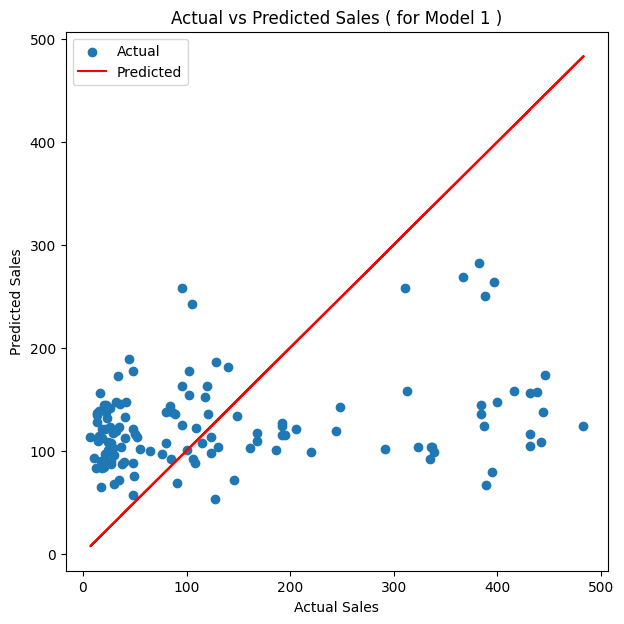



Performance of Model 3:

Mean Squared Error: 21776.95506947058 

Root Mean Squared Error: 147.57016998523306 

Mean Absolute Error: 106.59609335683483 

Explained Variance Score: -0.10571241843075097 

R2 Score: -0.10573243674984867 





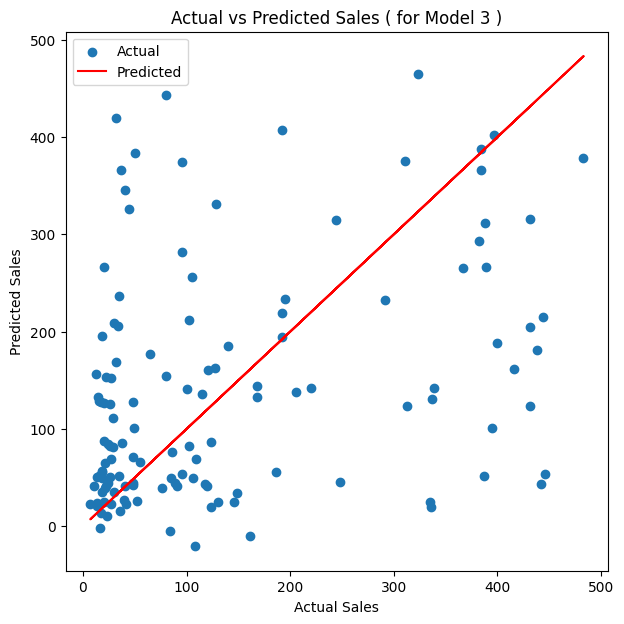



Performance of Model 5:

Mean Squared Error: 17420.03991327079 

Root Mean Squared Error: 131.98499881907333 

Mean Absolute Error: 99.53219562200074 

Explained Variance Score: 0.1159278563750118 

R2 Score: 0.11549143945362383 





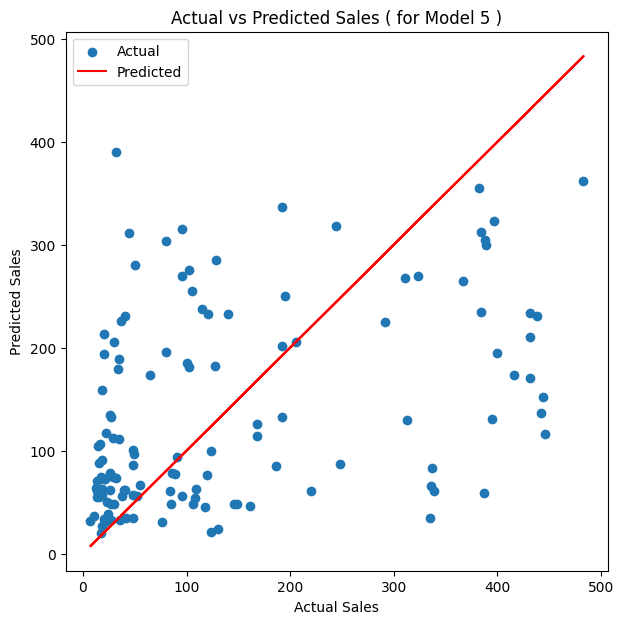



Performance of Model 7:

Mean Squared Error: 15371.537132615587 

Root Mean Squared Error: 123.98200326102005 

Mean Absolute Error: 92.51046330331451 

Explained Variance Score: 0.2204448734268929 

R2 Score: 0.21950487770138816 





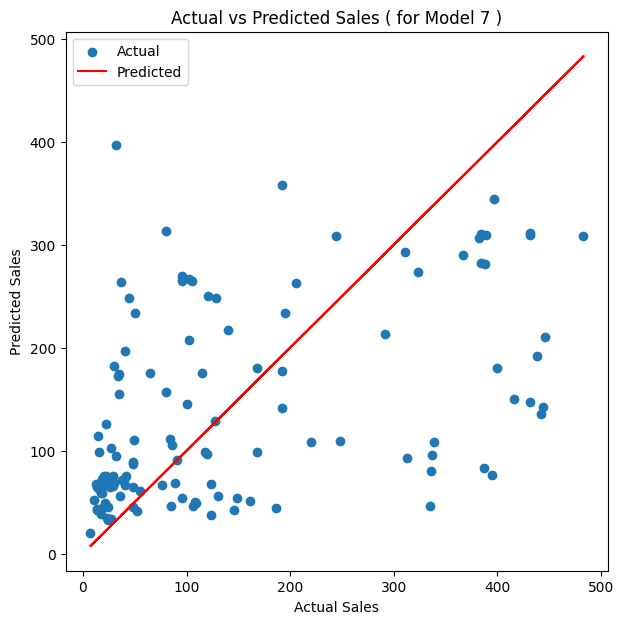



Performance of Model 9:

Mean Squared Error: 14837.18128724779 

Root Mean Squared Error: 121.80796889878671 

Mean Absolute Error: 101.6524624148533 

Explained Variance Score: 0.25718195822150947 

R2 Score: 0.2466369808400124 





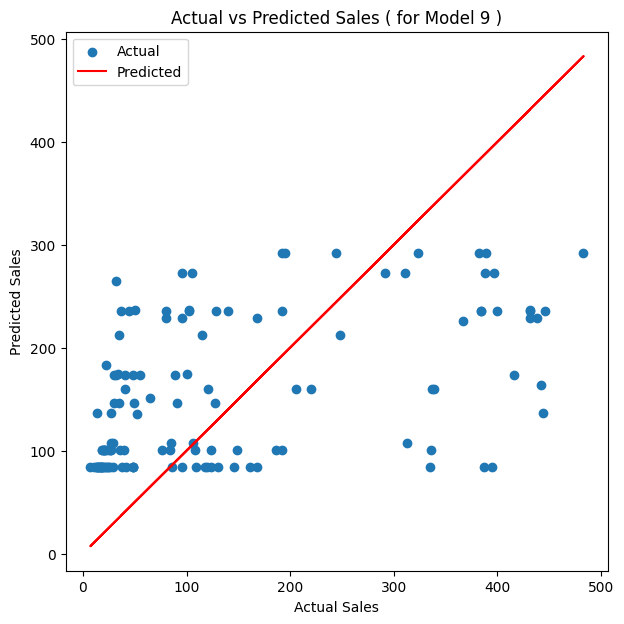



Performance of Model 11:

Mean Squared Error: 27163.132807046513 

Root Mean Squared Error: 164.81241702932007 

Mean Absolute Error: 118.46937209302328 

Explained Variance Score: -0.3792096181218283 

R2 Score: -0.3792174770384684 





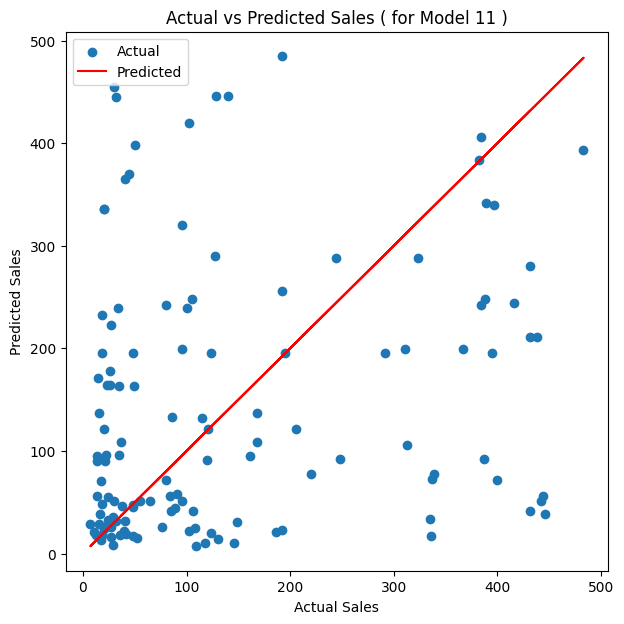



Performance of Model 13:

Mean Squared Error: 21536.374503339957 

Root Mean Squared Error: 146.75276659518198 

Mean Absolute Error: 113.39900527131785 

Explained Variance Score: -0.08097970015362899 

R2 Score: -0.09351687517231655 





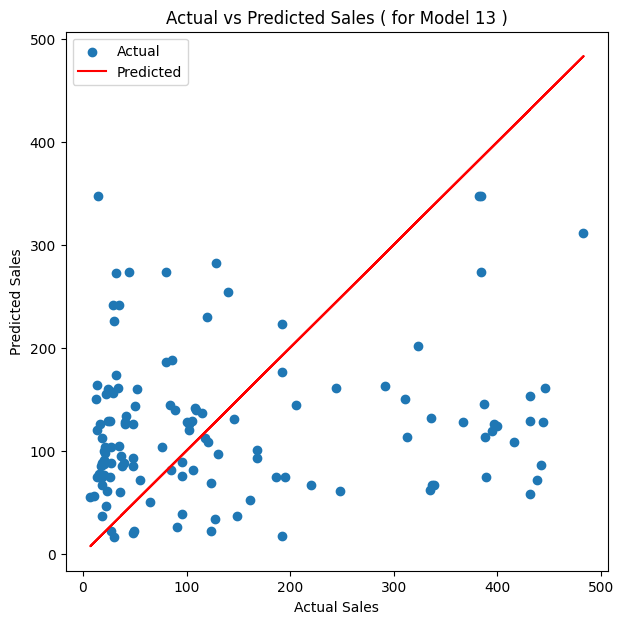



Performance of Model 15:

Mean Squared Error: 25227.001880609278 

Root Mean Squared Error: 158.83010382358023 

Mean Absolute Error: 105.62823388194997 

Explained Variance Score: 0.008168177841721858 

R2 Score: -0.28090975861196243 





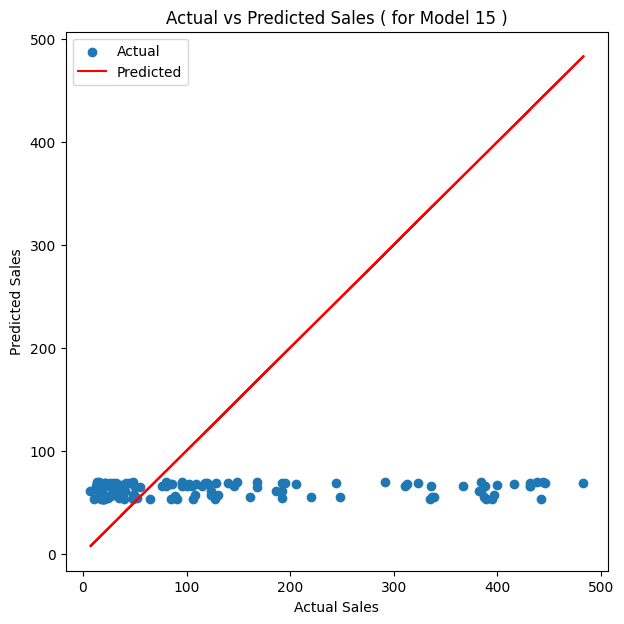



Performance of Model 17:

Mean Squared Error: 18306.565741273494 

Root Mean Squared Error: 135.3017580864103 

Mean Absolute Error: 107.05126112443294 

Explained Variance Score: 0.08045159052114381 

R2 Score: 0.07047778346214184 





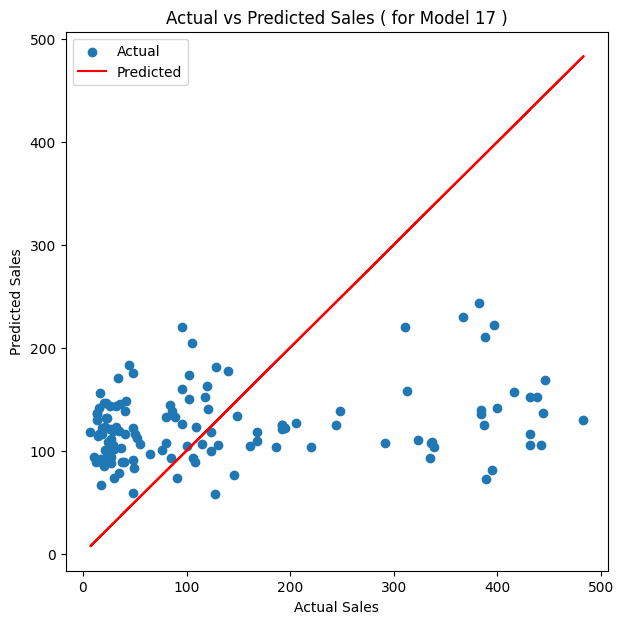



Performance of Model 19:

Mean Squared Error: 18572.81348903428 

Root Mean Squared Error: 136.282109937564 

Mean Absolute Error: 107.60423880752613 

Explained Variance Score: 0.06801549321388334 

R2 Score: 0.05695896184674454 





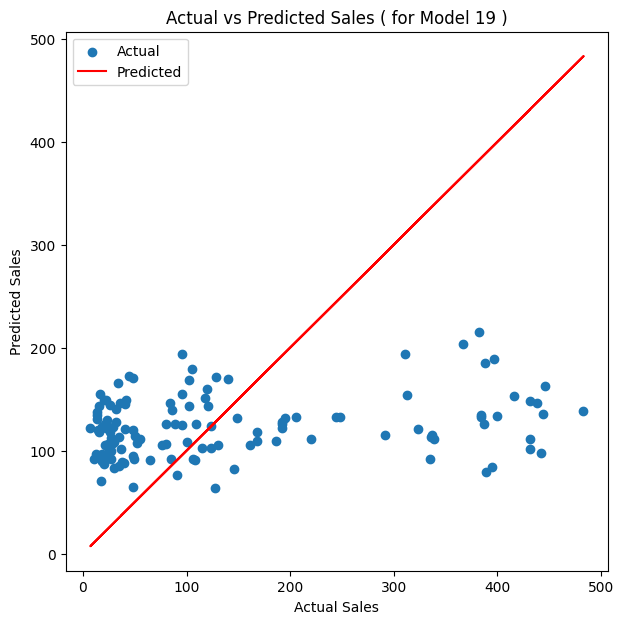

In [154]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10]:
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_test, i),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, i)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_test, i),"\n")
  print("Explained Variance Score:", explained_variance_score(y_test, i),"\n")
  print("R2 Score:", r2_score(y_test, i),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_test,i)
  plt.plot(y_test,y_test,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.show()
  print("\n")
  j+=1
  j+=1

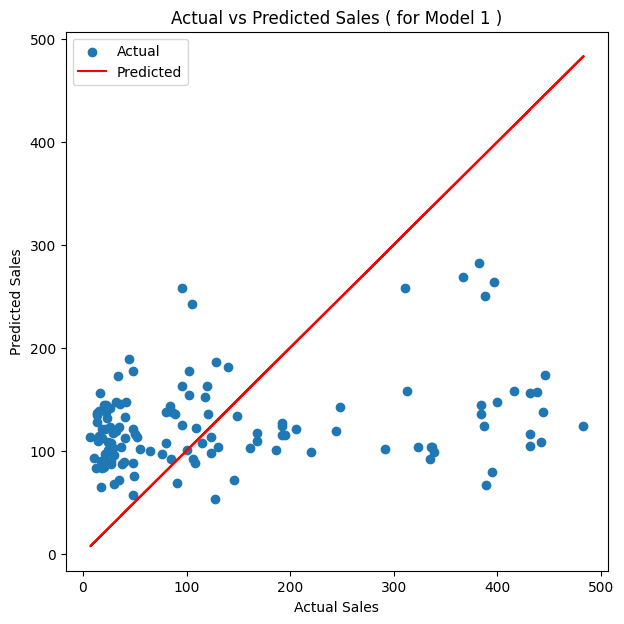

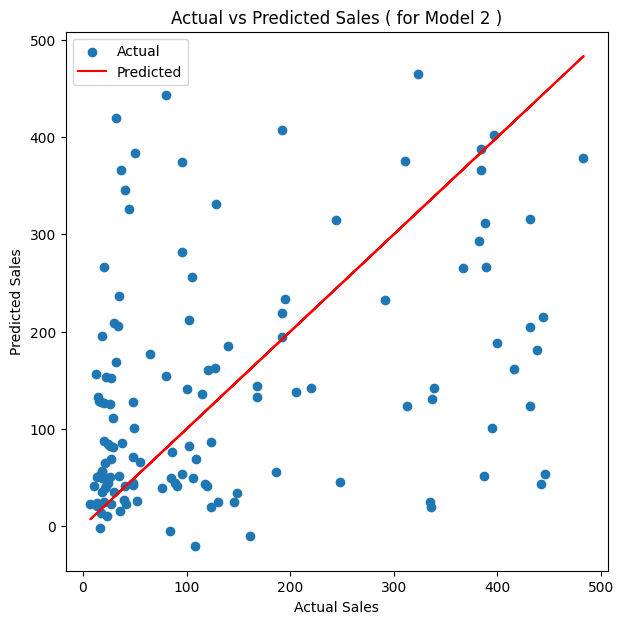

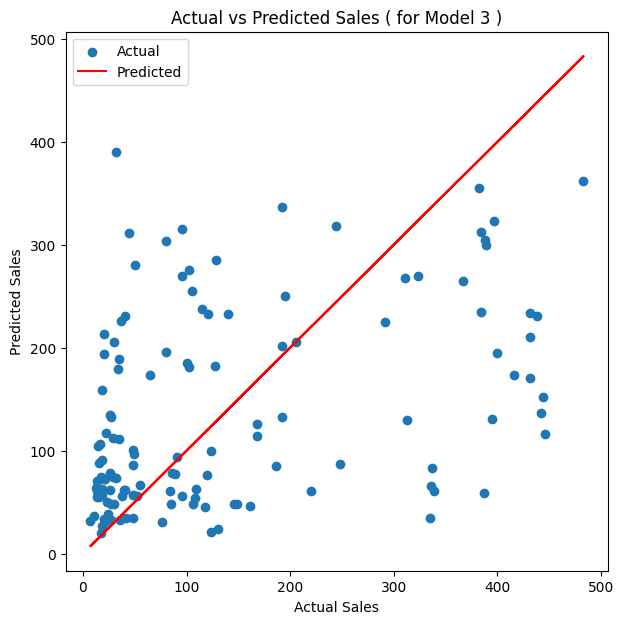

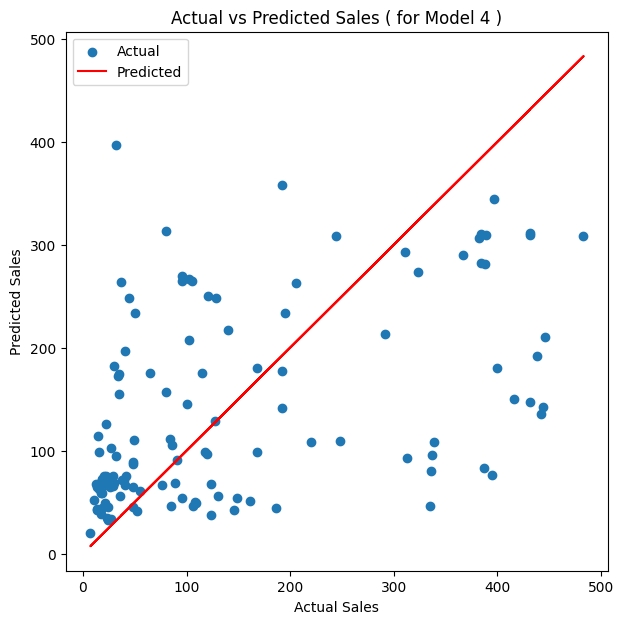

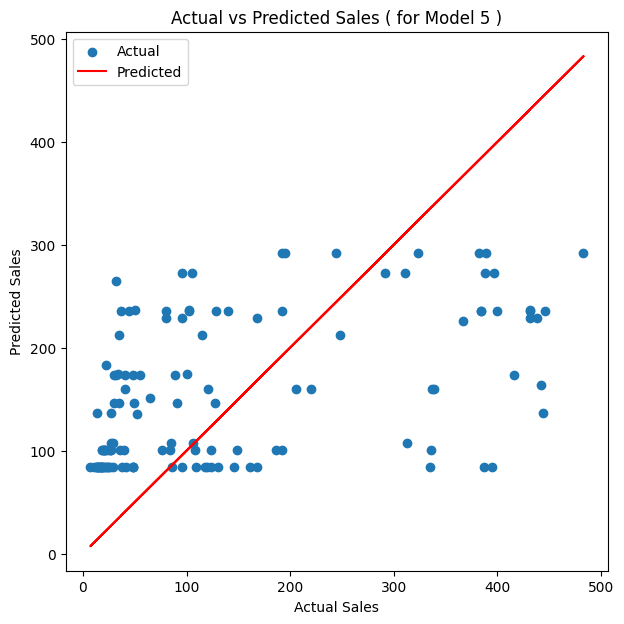

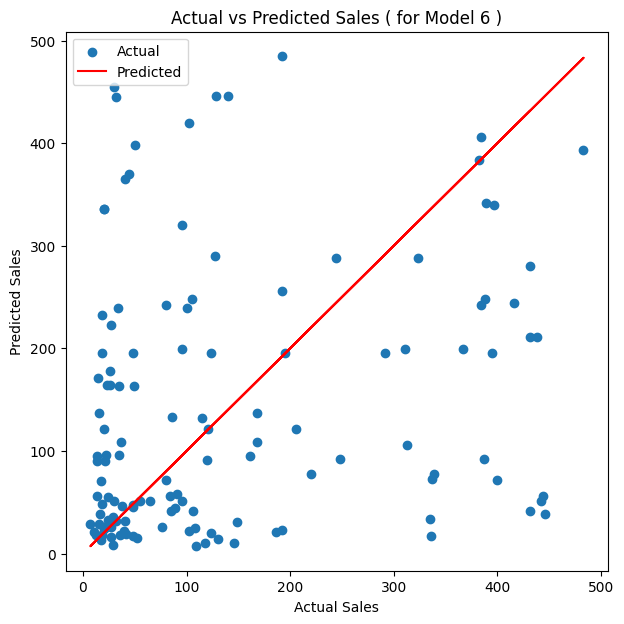

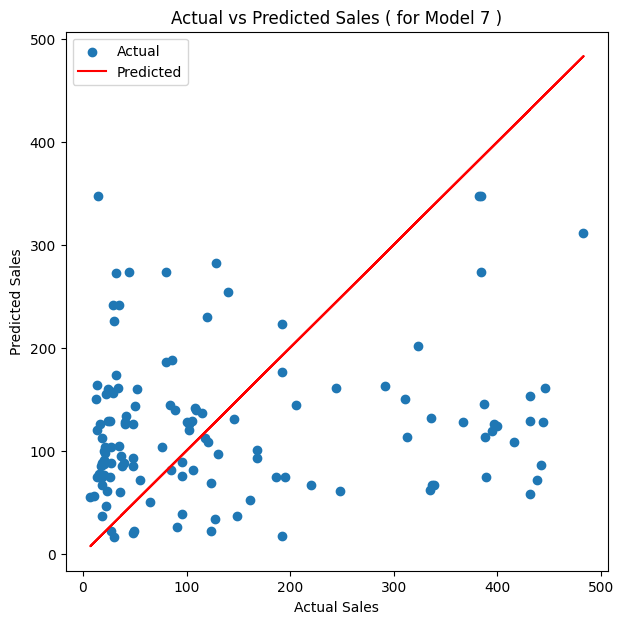

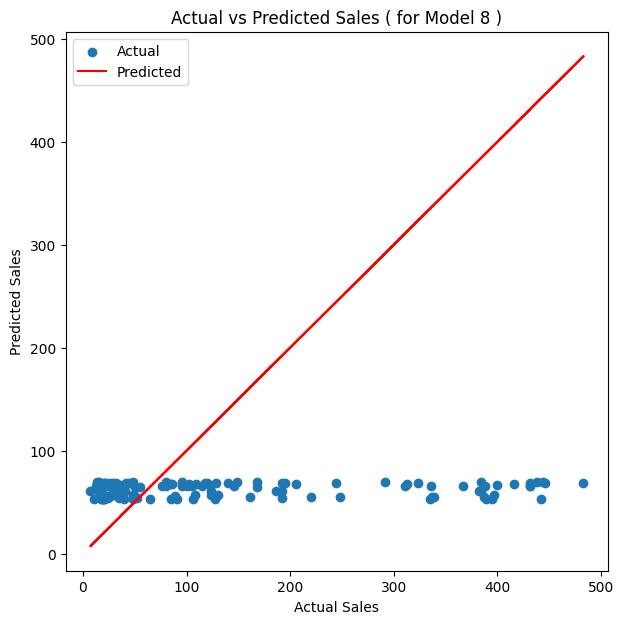

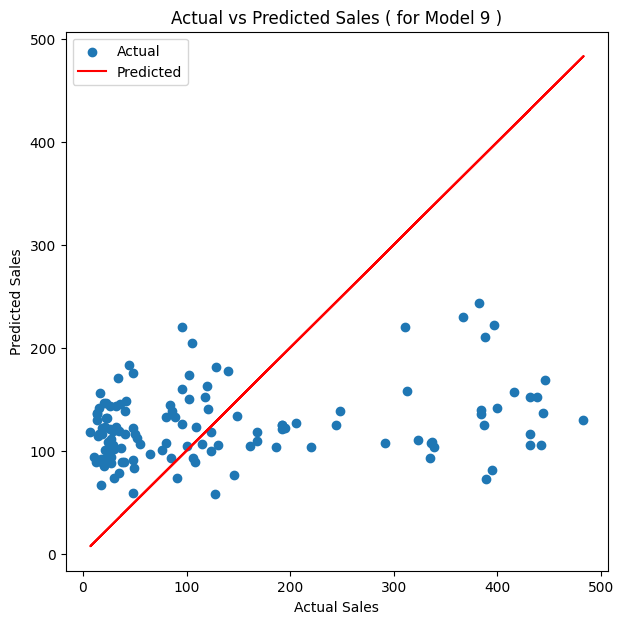

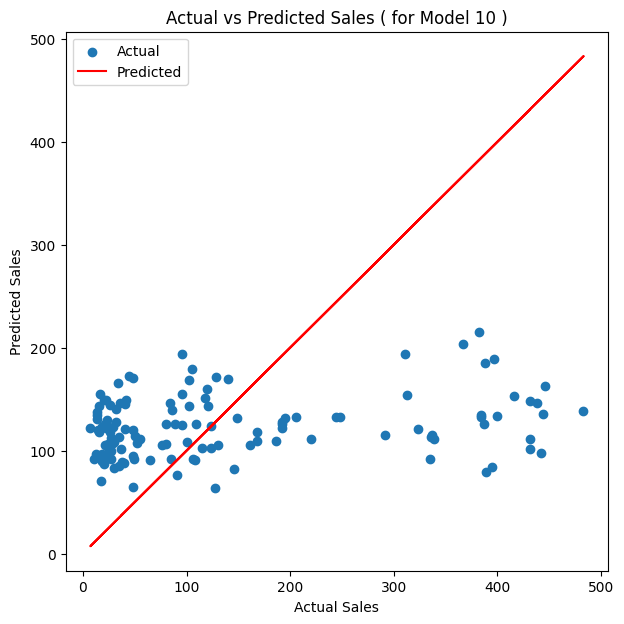

In [155]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10]:
  plt.figure(figsize=(7,7))
  plt.scatter(y_test,i)
  plt.plot(y_test,y_test,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.show()
  print("\n")
  j+=1

In [156]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_final))
print("Explained Variance Score:", explained_variance_score(y_test, pred_final))
print("R2 Score:", r2_score(y_test, pred_final))


Mean Squared Error: 16261.931038992227
Root Mean Squared Error: 127.52227663821026
Mean Absolute Error: 99.66458304801459
Explained Variance Score: 0.18230182161879238
R2 Score: 0.17429481869064545


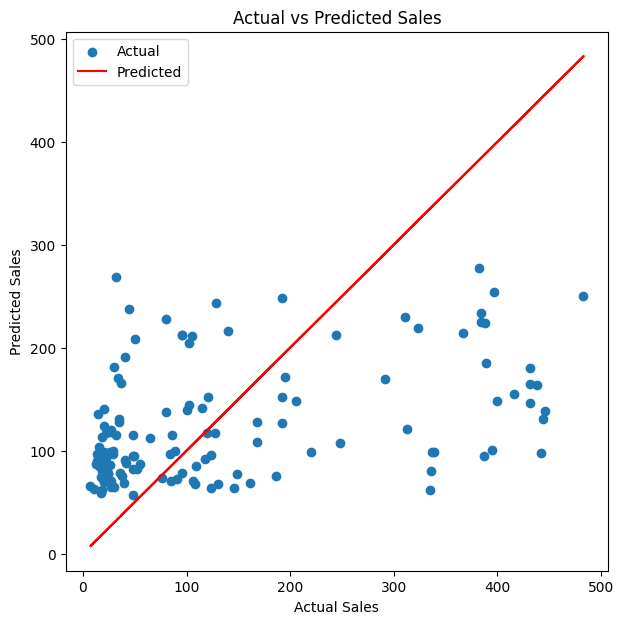

In [157]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,pred_final)
plt.plot(y_test,y_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.show()


In [158]:
m=consumer_mod_data.drop(columns=['Profit'],axis='1')
n=consumer_mod_data['Profit']
m_train,m_test,n_train,n_test=train_test_split(m,n,test_size=0.2,random_state=42)

In [159]:
model_1.fit(m_train, n_train)
model_2.fit(m_train, n_train)
model_3.fit(m_train, n_train)
model_4.fit(m_train, n_train)
model_5.fit(m_train, n_train)
model_6.fit(m_train, n_train)
model_7.fit(m_train, n_train)
model_8.fit(m_train, n_train)
model_9.fit(m_train, n_train)
model_10.fit(m_train, n_train)

Lasso()

In [160]:
pred_1 = model_1.predict(m_test)
pred_2 = model_2.predict(m_test)
pred_3 = model_3.predict(m_test)
pred_4=model_4.predict(m_test)
pred_5=model_5.predict(m_test)
pred_6=model_6.predict(m_test)
pred_7=model_7.predict(m_test)
pred_8=model_8.predict(m_test)
pred_9=model_9.predict(m_test)
pred_10=model_10.predict(m_test)

Performance of Model 1:

Mean Squared Error: 33244.96943751509 

Root Mean Squared Error: 182.33203075026364 

Mean Absolute Error: 123.70631209473363 

Explained Variance Score: 0.08887814520299009 

R2 Score: -0.6880248385759047 





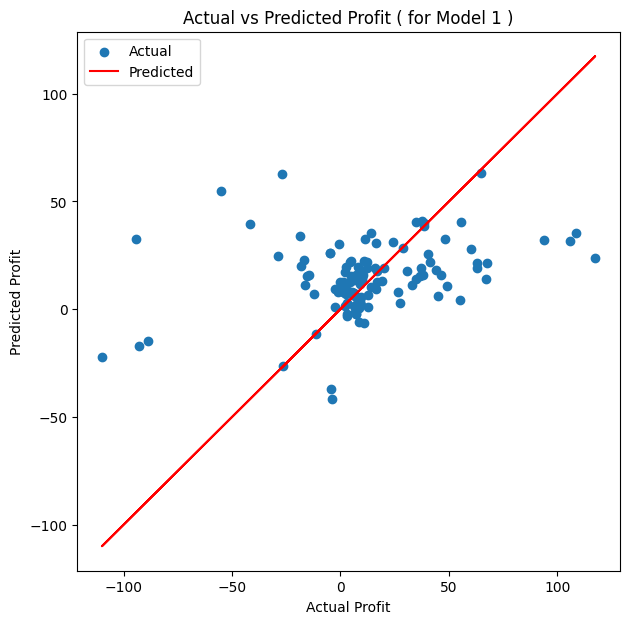



Performance of Model 2:

Mean Squared Error: 34928.24086156002 

Root Mean Squared Error: 186.89098657120954 

Mean Absolute Error: 124.20219080888023 

Explained Variance Score: 0.009776317978292703 

R2 Score: -0.7734935281830162 





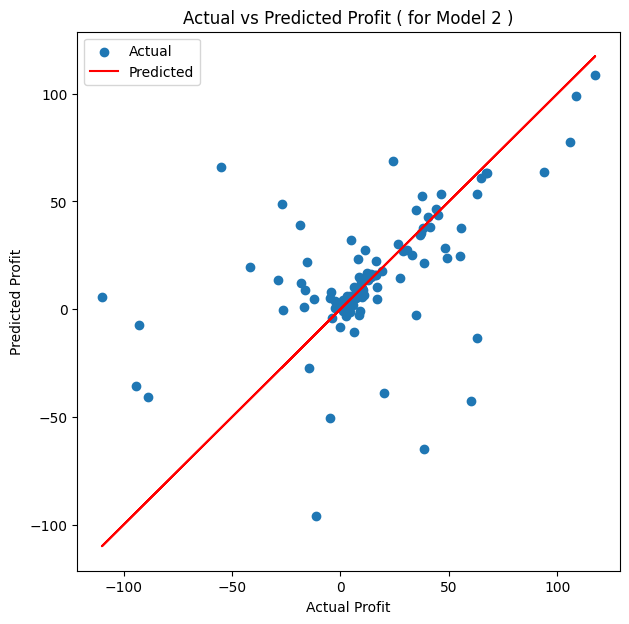



Performance of Model 3:

Mean Squared Error: 33851.0386736499 

Root Mean Squared Error: 183.9865176409671 

Mean Absolute Error: 123.0961287131783 

Explained Variance Score: 0.050583188912870725 

R2 Score: -0.7187982139707942 





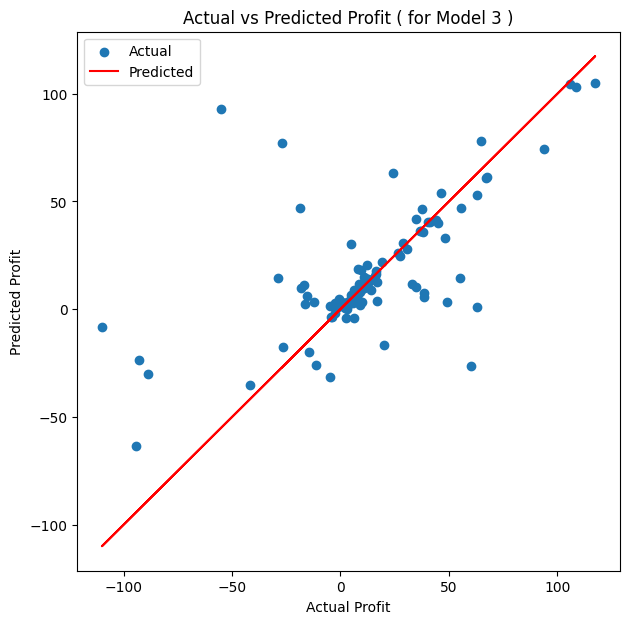



Performance of Model 4:

Mean Squared Error: 34442.67127429726 

Root Mean Squared Error: 185.5873683047886 

Mean Absolute Error: 124.32484027624967 

Explained Variance Score: 0.03597900124447384 

R2 Score: -0.7488385641982496 





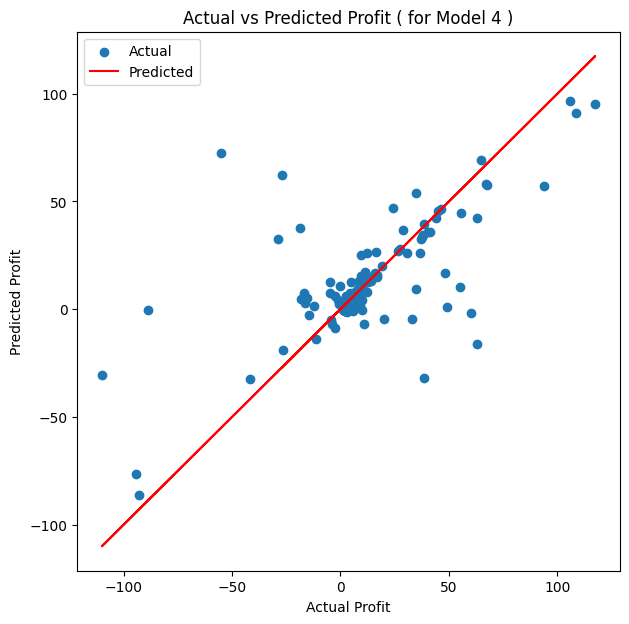



Performance of Model 5:

Mean Squared Error: 35993.58638032813 

Root Mean Squared Error: 189.71975748542408 

Mean Absolute Error: 124.84010858667446 

Explained Variance Score: -0.052986202256752435 

R2 Score: -0.8275868159126414 





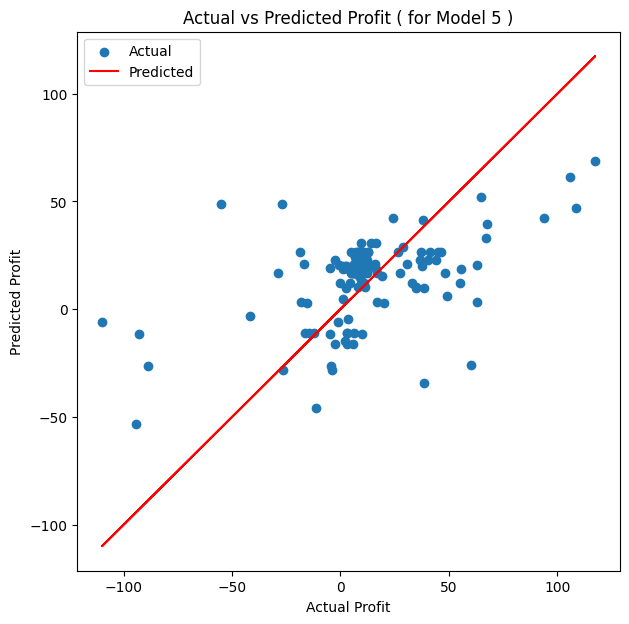



Performance of Model 6:

Mean Squared Error: 34740.345639982326 

Root Mean Squared Error: 186.38762201386209 

Mean Absolute Error: 122.8742108527132 

Explained Variance Score: 0.0026567366385266133 

R2 Score: -0.763953083224298 





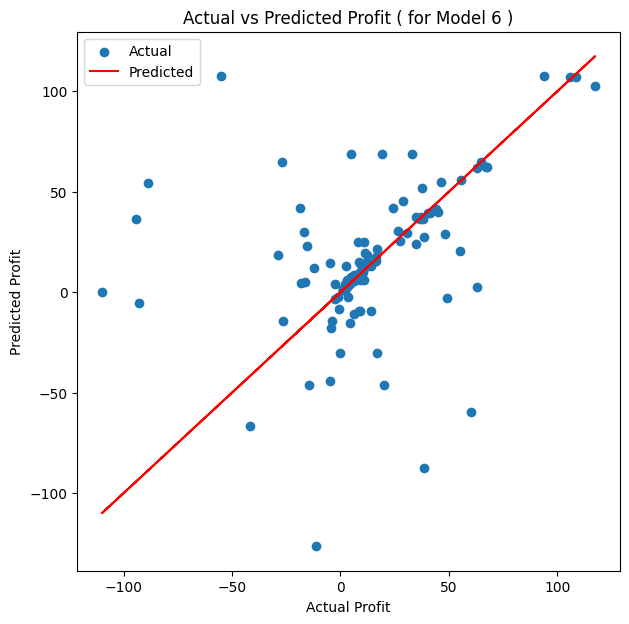



Performance of Model 7:

Mean Squared Error: 33914.34836816264 

Root Mean Squared Error: 184.15848709240265 

Mean Absolute Error: 124.04450744186047 

Explained Variance Score: 0.059029998496446634 

R2 Score: -0.7220127856388783 





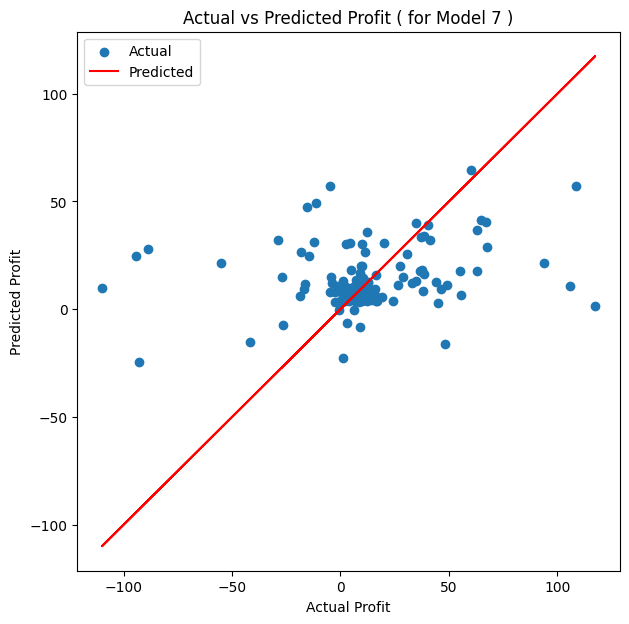



Performance of Model 8:

Mean Squared Error: 36209.00184684185 

Root Mean Squared Error: 190.28663076223157 

Mean Absolute Error: 128.71045844719066 

Explained Variance Score: 0.0025986007662139876 

R2 Score: -0.8385246108404427 





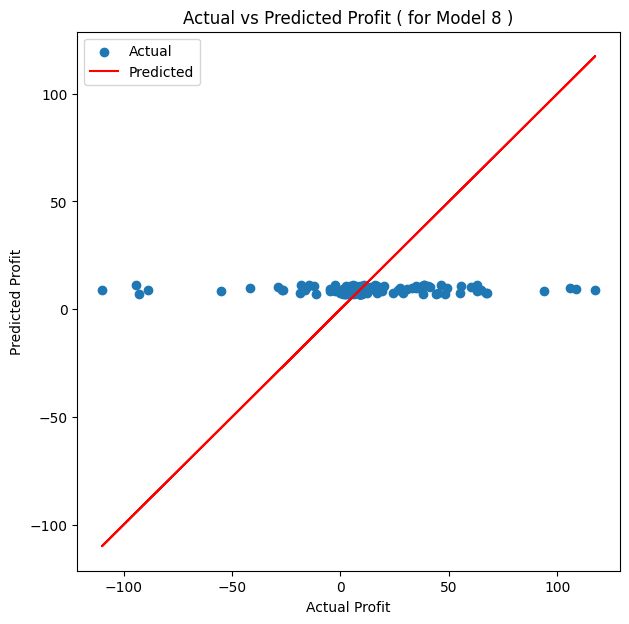



Performance of Model 9:

Mean Squared Error: 33139.182146900646 

Root Mean Squared Error: 182.04170441659969 

Mean Absolute Error: 123.55018792271497 

Explained Variance Score: 0.09218413374219292 

R2 Score: -0.6826534522523751 





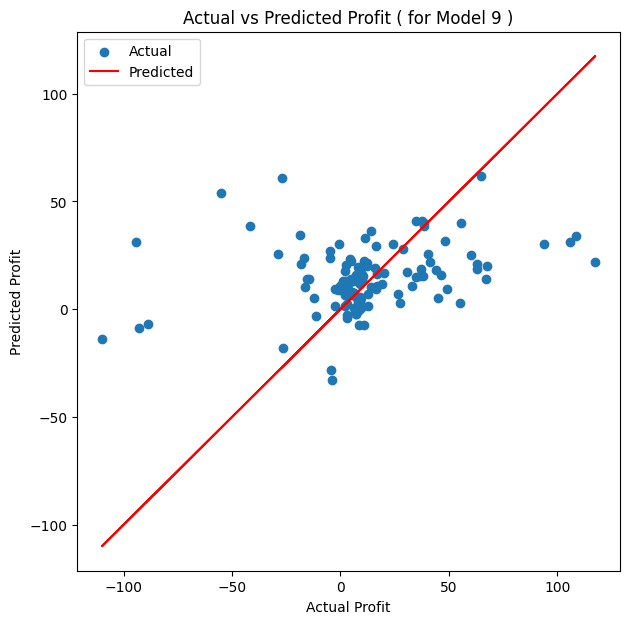



Performance of Model 10:

Mean Squared Error: 32711.040295280098 

Root Mean Squared Error: 180.86193711027232 

Mean Absolute Error: 122.76180543136066 

Explained Variance Score: 0.10415953443759096 

R2 Score: -0.6609144014366501 





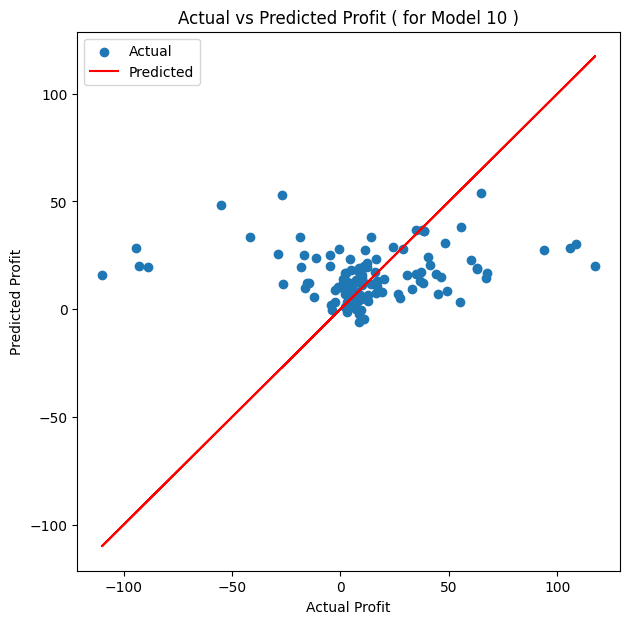

In [161]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10]:
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_test, i),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, i)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_test, i),"\n")
  print("Explained Variance Score:", explained_variance_score(y_test, i),"\n")
  print("R2 Score:", r2_score(y_test, i),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(n_test,i)
  plt.plot(n_test,n_test,'r')
  plt.xlabel("Actual Profit")
  plt.ylabel(f"Predicted Profit")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Profit ( for Model {j} )")
  plt.show()
  print("\n")
  j+=1


Mean Squared Error: 742.7470825174966
Root Mean Squared Error: 27.253386624738887
Mean Absolute Error: 15.749026621522361
Explained Variance Score: 0.3204920884463528
R2 Score: 0.31823785819579553


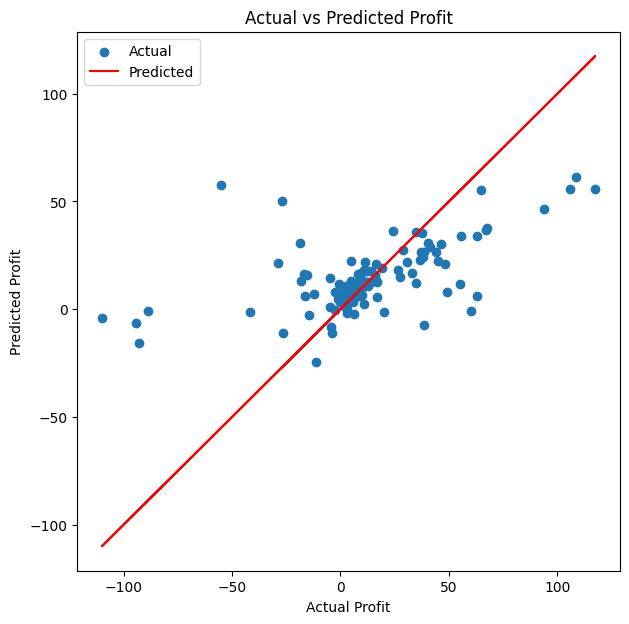

In [162]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(n_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(n_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(n_test, pred_final))
print("Explained Variance Score:", explained_variance_score(n_test, pred_final))
print("R2 Score:", r2_score(n_test, pred_final))
plt.figure(figsize=(7,7))
plt.scatter(n_test,pred_final)
plt.plot(n_test,n_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Profit")
plt.show()